In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_boston().data, load_boston().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((506, 13), (506, 1))

In [66]:
class NN_build(object):
    def __init__(self, eta = 0.005, iterations = 1000, dims = [X.shape[1],50,50,1], lamb_ = 0.9, activation = 'relu'):
        self.eta = eta
        self.iterations = iterations
        self.dims = dims
        self.layers = len(dims)
        self.lamb_ = lamb_
        self.activation = activation
    
    def fit(self,X,y,X_test,y_test):
        X_ = X.T
        y_ = y.T
        X_test_ = X_test.T
        y_test_ = y_test.T
        A0 = X_
        m_ = len(y)
        i = 1
        cost_ =[]
        cost_mae_ = []
        val_cost = []
        parameters = {}
        
        for l in range(1,self.layers):  #he_init
            parameters['W'+str(l)] = np.random.randn(self.dims[l],self.dims[l-1]) * np.sqrt(2/self.dims[l-1])
            parameters['b'+str(l)] = np.zeros((self.dims[l],1))
            
            
        while(i != self.iterations+1):
            #forward prop
            Z1 =  np.dot(parameters['W1'],A0) + parameters['b1']
            if self.activation == 'relu':
                A1 =  self.relu(Z1)
            else:
                A1 = self.sigmoid(Z1)
            Z2 =  np.dot(parameters['W2'],A1) + parameters['b2']
            if self.activation == "relu":
                A2 =  self.relu(Z2)
            else:
                A2 = self.sigmoid(Z2)
            Z3 =  np.dot(parameters['W3'],A2) + parameters['b3']
            A3 =  Z3
            #cost
            pred = self.predict(X_test_, parameters)
            l2_reg = (self.lamb_/(m_*2)) * (np.sum(np.square(parameters['W1'])) +  np.sum(np.square(parameters['W2'])) + np.sum(np.square(parameters['W3'])) )
            cost = self.MSE(y_,A3,m_) + l2_reg
            cost_.append(cost)
            mae = self.MAE(y_,A3,m_) + l2_reg
            mae_val = self.MAE(y_test_,pred,len(y_test))
            val_cost.append(mae_val)
            cost_mae_.append(mae) 
            #derivative
            dZ3 = A3 - y_
            dW3 = (1/m_) * np.dot(dZ3, A2.T) + (self.lamb_/m_) * parameters['W3']
            db3 = (1/m_) * np.sum(dZ3, axis = 1, keepdims= True)
            if self.activation == 'relu':
                dZ2 = np.dot(parameters['W3'].T,dZ3) * np.where(A2>=0,1,0)  #(A2 * (1-A2))
            else:
                dZ2 = np.dot(parameters['W3'].T,dZ3) * (A2 * (1-A2))
            dW2 = (1/m_) * np.dot(dZ2, A1.T) + (self.lamb_/m_) * parameters['W2']
            db2 = (1/m_) * np.sum(dZ2, axis = 1, keepdims= True)
            if self.activation == 'relu':
                dZ1 = np.dot(parameters['W2'].T,dZ2) * np.where(A1>=0,1,0) # (A1 * (1-A1))
            else:
                dZ1 = np.dot(parameters['W2'].T,dZ2) *  (A1 * (1-A1))
            dW1 = (1/m_) * np.dot(dZ1, A0.T) + (self.lamb_/m_) * parameters['W1']
            db1 = (1/m_) * np.sum(dZ1, axis = 1, keepdims= True)          
            #updates
            parameters['W1'] -= self.eta * dW1
            parameters['W2'] -= self.eta * dW2
            parameters['W3'] -= self.eta * dW3
            parameters['b1'] -= self.eta * db1
            parameters['b2'] -= self.eta * db2
            parameters['b3'] -= self.eta * db3
            if i % 500 ==0:
                print('Epoch:{}: cost:{} MAE:{} val_MAE:{}'.format(i,cost,mae,mae_val))
            
            i += 1
        history = pd.DataFrame(cost_, columns= ['cost'])
        history['mae'] = cost_mae_
        history['val'] = val_cost
        plt.figure(figsize = (14,4))
        plt.subplot(1,2,1)
        plt.plot(history.cost)
        plt.subplot(1,2,2)
        plt.plot(history.mae,'b')
        plt.plot(history.val,'r')
        plt.show()
        return parameters
    
    
    def MAE(self,y_true,y_pred,m_):
        return (1/m_) * np.sum(np.abs(y_true - y_pred))
    
    def MSE(self,y_true,y_pred,m_):
        return (1/m_) * np.sum(np.square(y_true - y_pred))
    
    def sigmoid(self,z):
        return 1 / (1+ np.exp(-z))
    
    def relu(self,z):
        return z * (z>0).astype(int)
    
    def predict(self,X_test, parameters):
        if self.activation == 'relu':
            res = np.dot(parameters['W3'],self.relu(np.dot(parameters['W2'] ,  self.relu(np.dot(parameters['W1'],X_test) + parameters['b1']))) + parameters['b2']) + parameters['b3']
        else:
            res = np.dot(parameters['W3'],self.sigmoid(np.dot(parameters['W2'] ,  self.sigmoid(np.dot(parameters['W1'],X_test) + parameters['b1']))) + parameters['b2']) + parameters['b3']
        return res
    

In [67]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

Epoch:500: cost:117.0078138292179 MAE:8.621612594240512 val_MAE:8.78274027348689
Epoch:1000: cost:95.63892216976157 MAE:7.718602270716761 val_MAE:7.637700378122549
Epoch:1500: cost:87.95746545448542 MAE:7.33079435121528 val_MAE:7.122108232980667
Epoch:2000: cost:83.71565691892087 MAE:7.087226662448374 val_MAE:6.798836049039441
Epoch:2500: cost:80.75166926229501 MAE:6.905865471689694 val_MAE:6.600595337046535
Epoch:3000: cost:78.30354238942537 MAE:6.760851454431687 val_MAE:6.471978700754973
Epoch:3500: cost:76.16280179999751 MAE:6.637814804441646 val_MAE:6.375934540602485
Epoch:4000: cost:74.27757051325538 MAE:6.533387491288789 val_MAE:6.294251181140686
Epoch:4500: cost:72.59464678067171 MAE:6.444124501912029 val_MAE:6.2257302924934415
Epoch:5000: cost:71.09349153591239 MAE:6.365622897840332 val_MAE:6.166254552536243
Epoch:5500: cost:69.78165809945051 MAE:6.2938905444528315 val_MAE:6.117844152432584
Epoch:6000: cost:68.6432192579304 MAE:6.228487081566466 val_MAE:6.083012225910338
Epoch:

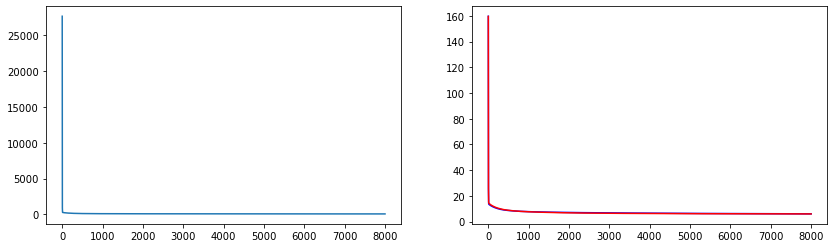

In [68]:
parameters = NN_build(eta = 0.0000005, iterations = 8000, dims = [X.shape[1],32,32,1], lamb_ = 0.9, activation='relu').fit(X_train,y_train,X_test,y_test)

<ipython-input-66-6a0392d99ab3>:98: RuntimeWarning: overflow encountered in exp
  return 1 / (1+ np.exp(-z))


Epoch:500: cost:74.16098876510328 MAE:6.330443647701674 val_MAE:6.745188344906823
Epoch:1000: cost:68.99563650827562 MAE:6.078362543103605 val_MAE:6.336893249432299
Epoch:1500: cost:65.62318488696164 MAE:5.9155954093323535 val_MAE:6.092157268186428
Epoch:2000: cost:62.165680476882635 MAE:5.792200184480683 val_MAE:5.869818704781266
Epoch:2500: cost:60.3227483265612 MAE:5.682712027064057 val_MAE:5.747070228110922
Epoch:3000: cost:61.78994507520757 MAE:5.638693319580347 val_MAE:5.6749676573470555
Epoch:3500: cost:58.502068665767496 MAE:5.745011186287949 val_MAE:5.745167043521985
Epoch:4000: cost:63.06219820742477 MAE:5.900435422608755 val_MAE:5.77010621408852
Epoch:4500: cost:62.68142370179915 MAE:5.888753529494046 val_MAE:5.779772077932881
Epoch:5000: cost:62.27722498977516 MAE:5.885271020890085 val_MAE:5.792341036753005
Epoch:5500: cost:61.96780044301978 MAE:5.847918275690068 val_MAE:5.771783371183462
Epoch:6000: cost:61.444776521223 MAE:5.845356032183213 val_MAE:5.788297601834802
Epoch

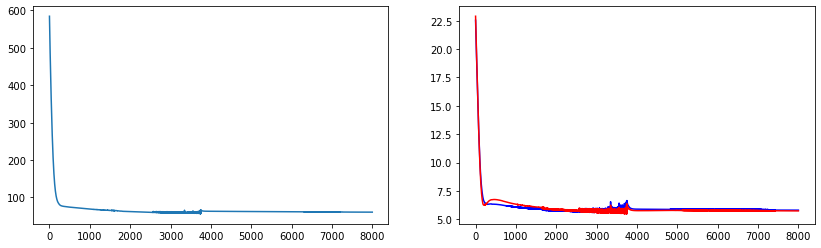

In [70]:
parameters = NN_build(eta = 0.0005, iterations = 8000, dims = [X.shape[1],32,32,1], lamb_ = 0.9, activation='sigmoid').fit(X_train,y_train,X_test,y_test)